### Introduction to higher dimensional feature reduction approaches 
1. `t-SNE Method` _ Map higher dimensional features ----> Lower dimensional. 
2. `UMAP Method`: - Map higher dimensional features ----> Lower dimensional without loosing key features 
3. `PCA Method`: - Works very well in linearly separable datasets  

In [6]:
#importing libraries 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [7]:
#Collecting datasets 

centre = [
    [ 2, -6, -6], 
    [-1,  9,  4], 
    [-8,  7, -2], 
    [ 4,  7,  2] ]

cluster_variance = [1, 1, 2, 3.5]

x, labels = make_blobs(n_samples= 500, n_features=3, centers= centre, cluster_std= cluster_variance, random_state= 42)

In [8]:
#3-D visualization of clusters 
import plotly.express as px

#convert 'x' features in dataframe 
df = pd.DataFrame(x, columns= ['X', 'Y', 'Z'])

fig = px.scatter_3d(
    df, 
    x= 'X', y= 'Y', z= 'Z', 
    opacity= 0.7, 
    title= '3D visualization of blobs clusters',
    color= labels.astype('str'), 
)

fig.update_traces(
    #updating marker edge color = black 
    marker= dict(size= 5, line= dict(width= 1, color= 'black')), 
    showlegend= True, 
)

fig.update_layout(
    coloraxis_showscale= False,
    width= 800, height= 600
)
fig.show()

In [9]:
#Using Dataset pre-processing method to make features more comparable 
#Method using: - Standardization 
from sklearn.preprocessing import StandardScaler

stand_X = StandardScaler().fit_transform(x)

In [10]:
#1. Implementation of T-SNE method 
from sklearn.manifold import TSNE

t_sne = TSNE(n_components= 2, max_iter= 1000, random_state= 42, perplexity= 30)

t_sne = t_sne.fit_transform(stand_X)

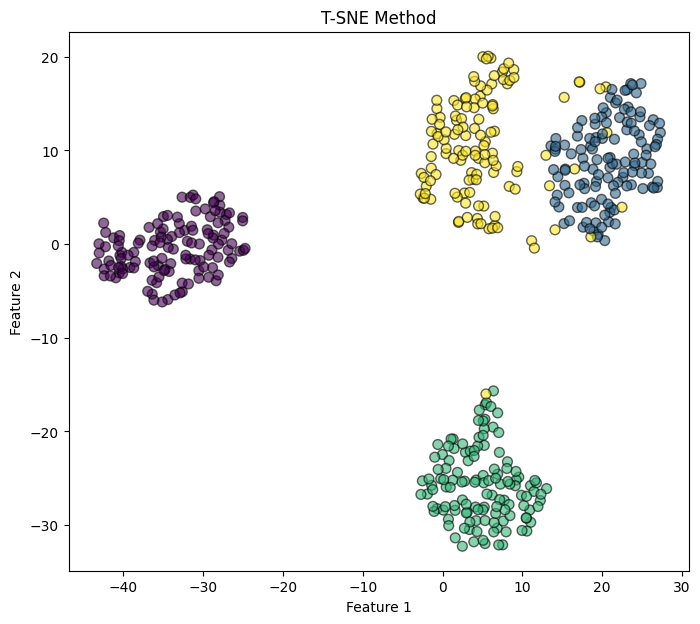

In [11]:
#Visualization of T-SNE transformation on the datasets 
fig = plt.figure(figsize= (8, 7))

fig.add_subplot(1, 1, 1)
plt.scatter(t_sne[:, 0], t_sne[:, 1], c= labels, cmap= 'viridis', s= 50, alpha= 0.6, edgecolors= 'k')
plt.title('T-SNE Method')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [12]:
#2. Implementation of PCA method 
from sklearn.decomposition import PCA

pca = PCA(n_components= 2, random_state= 42)

pca = pca.fit_transform(stand_X)

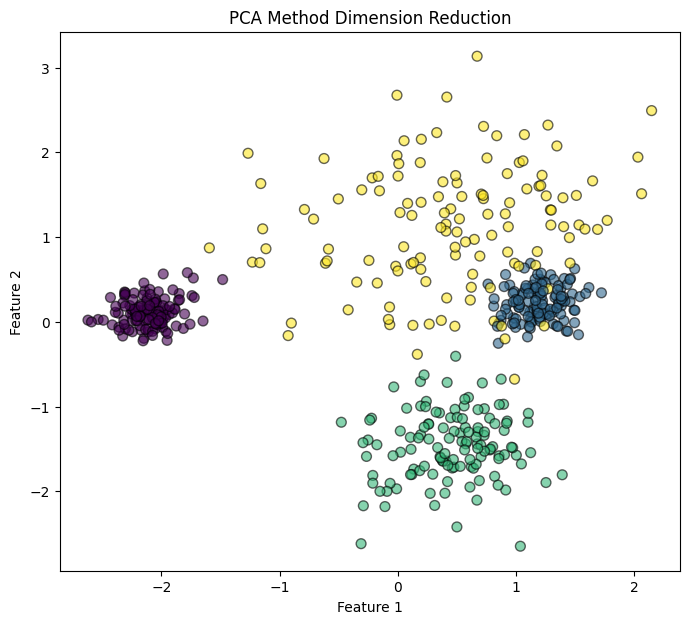

In [13]:
#Visualization of PCA on the new features 
fig = plt.figure(figsize= (8, 7))

ax = fig.add_subplot(1, 1, 1)
ax.scatter(pca[:, 0], pca[:, 1], c= labels, cmap= 'viridis', edgecolors= 'k', alpha= 0.6, s= 50)
ax.set_title('PCA Method Dimension Reduction')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
plt.show()

In [15]:
#3. Implementation of UMAP Method 
import umap.umap_ as UMAP

umap_model = UMAP.UMAP(n_components= 2, random_state= 42, min_dist= 0.7, spread= 1, n_jobs= 1)

umap_model = umap_model.fit_transform(stand_X)

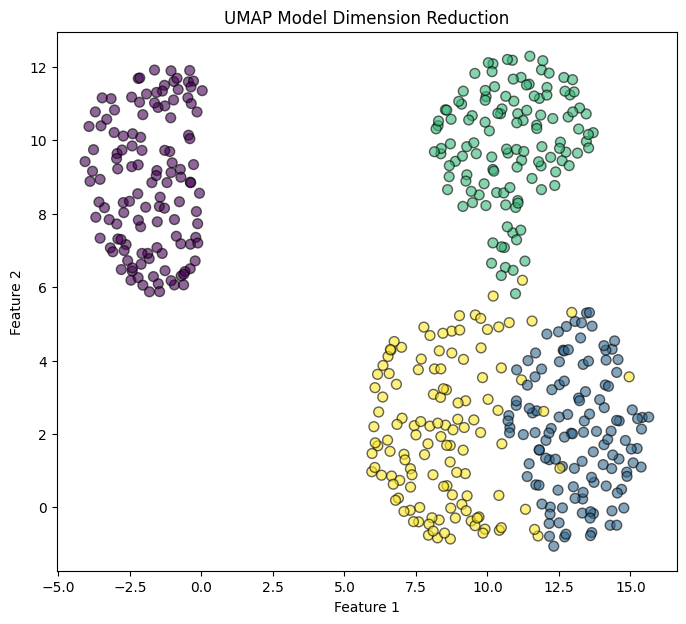

In [18]:
#Visualization of UMAP approach 
fig = plt.figure(figsize= (8, 7))

ax = fig.add_subplot(1, 1, 1)
ax.scatter(umap_model[:, 0], umap_model[:, 1], 
           c = labels, 
           cmap = 'viridis', 
           edgecolors= 'k', 
           s = 50, 
           alpha = 0.6)

ax.set_title('UMAP Model Dimension Reduction')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
plt.show()

### Applying different dimensionality reduction method in standarized datasets

#### Works well when datasets features are linearly separable and comparable. 
1. Applying PCA approach in datasets 
    - Converting 3 features to 2 features 
    - `Observation`: - PCA converts the features but the dentisity of each cluster is same which can cause high variance in the model. 
    -  Each cluster is very close to each other, which can cause noise and mis-interpretation when developing the model 

#### Mapping of the features from higher to lower dimensions (Non - Linear or Auxillary shape clusters)
2. Applying t-SNE approach in datasets 
    - converting and selction of features from 3 to 2 with dimensionality reduction 
    - `Observation`: - T-SNE converts 3 -> 2 features and made density of each cluster comparable. Although some of the datapoints are still overlapping to each other.  

3. Applying UMAP approach in datasets 
    - `Observations`: - UMAP converts the features from 3 -> 2 and the dentisity of clusters are similar and comparable. 
    - But still the performace of algorithm is not much better then `t-SNE approach`. 


4. **Time Metrics**
    - PCA << T-SNE << UMAP
    - UMAP model takes too much time to model out the features, and t-SNE and PCA take less time to compute feature extraction (Dimension Reduction)
    - **IMP**: - PCA preserve the clusters original separaton and dentisities.